In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc("font", family = font_name)

# 데이터 확인

In [4]:
df = pd.read_csv("./data/seoul.csv", skiprows = 6)

In [5]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,\t1907-10-01,108,13.5,7.9,20.7
1,\t1907-10-02,108,16.2,7.9,22.0
2,\t1907-10-03,108,16.2,13.1,21.3
3,\t1907-10-04,108,16.5,11.2,22.0
4,\t1907-10-05,108,17.6,10.9,25.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41814 entries, 0 to 41813
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41814 non-null  object 
 1   지점       41814 non-null  int64  
 2   평균기온(℃)  41058 non-null  float64
 3   최저기온(℃)  41055 non-null  float64
 4   최고기온(℃)  41055 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [10]:
df.shape

(41814, 5)

In [11]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41814.0,41058.000000,41055.000000,41055.000000
mean,108.0,11.761800,7.469443,16.766905
std,0.0,10.653653,10.879782,10.971288
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.700000,-1.400000,7.300000
50%,108.0,13.000000,8.000000,18.600000
75%,108.0,21.200000,17.100000,26.300000
max,108.0,33.700000,30.300000,39.600000


## 날짜 이상데이터 제거

In [12]:
df["날짜"]

0        \t1907-10-01
1        \t1907-10-02
2        \t1907-10-03
3        \t1907-10-04
4        \t1907-10-05
             ...     
41809    \t2023-05-25
41810    \t2023-05-26
41811    \t2023-05-27
41812    \t2023-05-28
41813    \t2023-05-29
Name: 날짜, Length: 41814, dtype: object

In [15]:
df["날짜"] = df["날짜"].str.strip()

## 결측치 확인

In [18]:
df.isna()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
41809,False,False,False,False,False
41810,False,False,False,False,False
41811,False,False,False,False,False
41812,False,False,False,False,False


In [19]:
df.isna().sum()

날짜           0
지점           0
평균기온(℃)    756
최저기온(℃)    759
최고기온(℃)    759
dtype: int64

In [21]:
df[df["최저기온(℃)"].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


In [22]:
df[df["최고기온(℃)"].isna()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


- 1950년대 6.25 전쟁으로 당시 데이터가 수집되지 않은 것으로 추정
    - 1950/06/25 ~ 1953/07/27

In [23]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [24]:
df.columns = ["날짜", "지점", "평균기온", "최저기온", "최고기온"]

In [25]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4


# 데이터 분석

## 서울이 가장 더웠던 날

- 서울의 최고 기온이 가장 높았던 날

In [28]:
df["최고기온"].max()

39.6

In [29]:
df["최고기온"].idxmax()

40051

In [30]:
df.loc[40051]

날짜      2018-08-01
지점             108
평균기온          33.6
최저기온          27.8
최고기온          39.6
Name: 40051, dtype: object

In [31]:
df.sort_values(by = "최고기온", ascending = False)

,날짜,지점,평균기온,최저기온,최고기온
40051,2018-08-01,108,33.6,27.8,39.6
31277,1994-07-24,108,33.1,28.1,38.4
40050,2018-07-31,108,32.6,27.8,38.3
11636,1939-08-10,108,30.1,24.5,38.2
31276,1994-07-23,108,32.6,28.0,38.2
...,...,...,...,...,...
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN
23691,1973-10-16,108,12.3,NaN,NaN


## 내 생일의 기온 변화

In [34]:
# 생일 데이터 추출 1
df[df["날짜"].str.endswith("10-05")]

,날짜,지점,평균기온,최저기온,최고기온
4,1907-10-05,108,17.6,10.9,25.4
370,1908-10-05,108,16.4,11.0,23.0
735,1909-10-05,108,11.8,7.2,17.9
1100,1910-10-05,108,15.4,8.5,23.2
1465,1911-10-05,108,11.6,5.3,20.7
...,...,...,...,...,...
40116,2018-10-05,108,16.9,15.7,19.0
40481,2019-10-05,108,18.7,14.7,21.9
40847,2020-10-05,108,13.3,8.5,18.4
41212,2021-10-05,108,23.6,21.7,26.5


In [35]:
# 생일 데이터 추출 2
ndf = df.copy()

In [37]:
ndf["date"] = pd.to_datetime(df["날짜"])

In [38]:
ndf.head()

,날짜,지점,평균기온,최저기온,최고기온,date
0,1907-10-01,108,13.5,7.9,20.7,1907-10-01
1,1907-10-02,108,16.2,7.9,22.0,1907-10-02
2,1907-10-03,108,16.2,13.1,21.3,1907-10-03
3,1907-10-04,108,16.5,11.2,22.0,1907-10-04
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05


In [39]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41814 entries, 0 to 41813
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41814 non-null  object        
 1   지점      41814 non-null  int64         
 2   평균기온    41058 non-null  float64       
 3   최저기온    41055 non-null  float64       
 4   최고기온    41055 non-null  float64       
 5   date    41814 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [43]:
ndf["date"].dt.month

0        10
1        10
2        10
3        10
4        10
         ..
41809     5
41810     5
41811     5
41812     5
41813     5
Name: date, Length: 41814, dtype: int64

In [45]:
ndf.iloc[0, -1].day

1

In [47]:
birthday_df = ndf[(ndf["date"].dt.month == 10) & (ndf["date"].dt.day == 5)]

In [50]:
birthday_df.head()

,날짜,지점,평균기온,최저기온,최고기온,date
4,1907-10-05,108,17.6,10.9,25.4,1907-10-05
370,1908-10-05,108,16.4,11.0,23.0,1908-10-05
735,1909-10-05,108,11.8,7.2,17.9,1909-10-05
1100,1910-10-05,108,15.4,8.5,23.2,1910-10-05
1465,1911-10-05,108,11.6,5.3,20.7,1911-10-05


#### 시각화

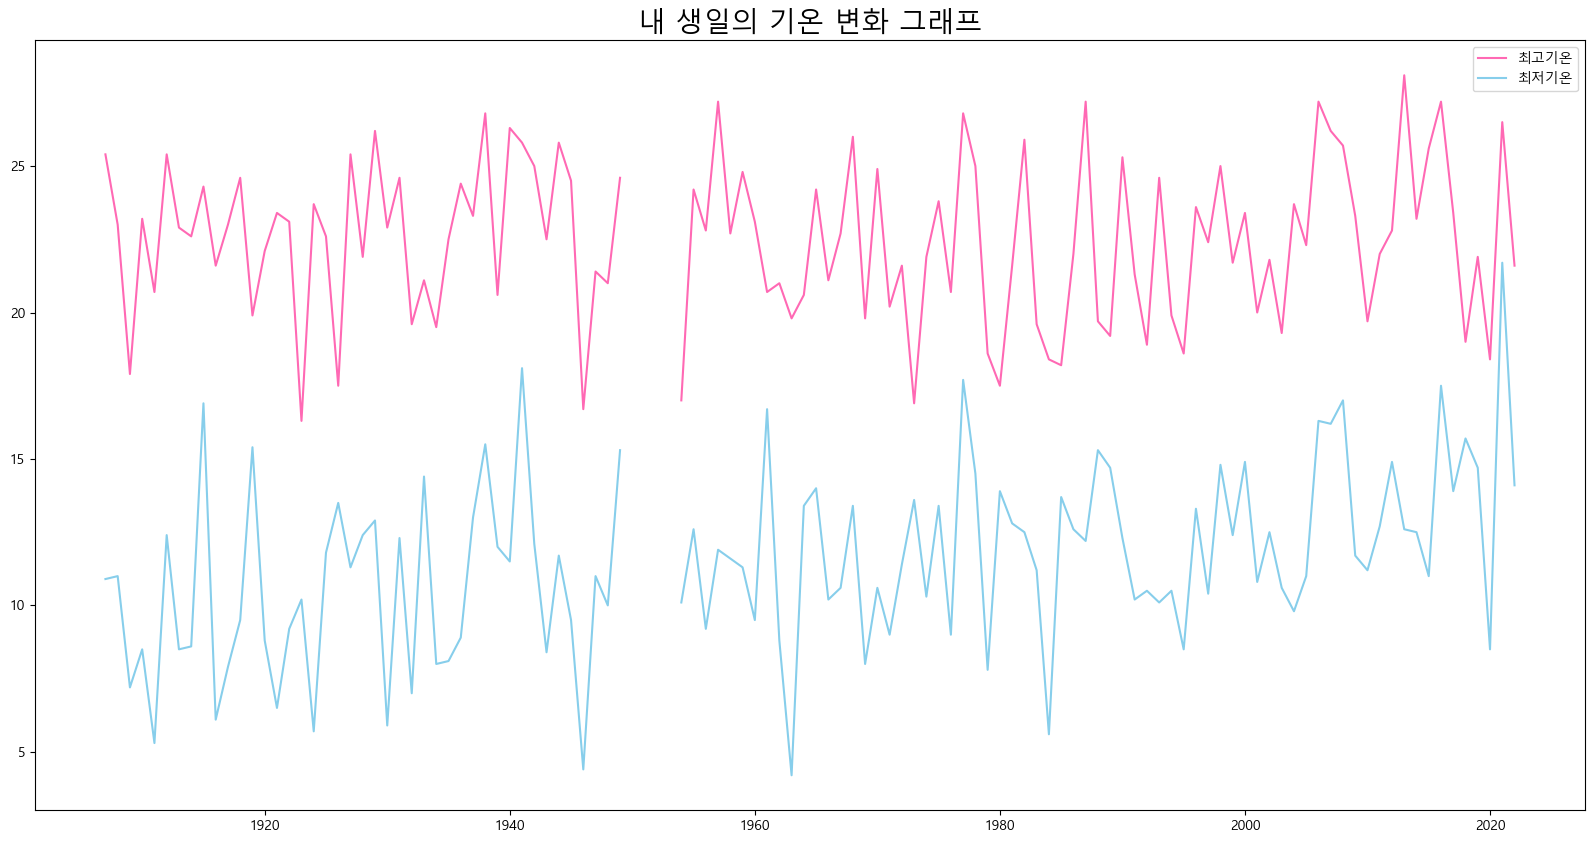

In [58]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(birthday_df["date"].dt.year, birthday_df["최고기온"], "hotpink", label = "최고기온")
ax.plot(birthday_df["date"].dt.year, birthday_df["최저기온"], "skyblue", label = "최저기온")

ax.legend()
ax.set_title("내 생일의 기온 변화 그래프", size = 20)

plt.show()

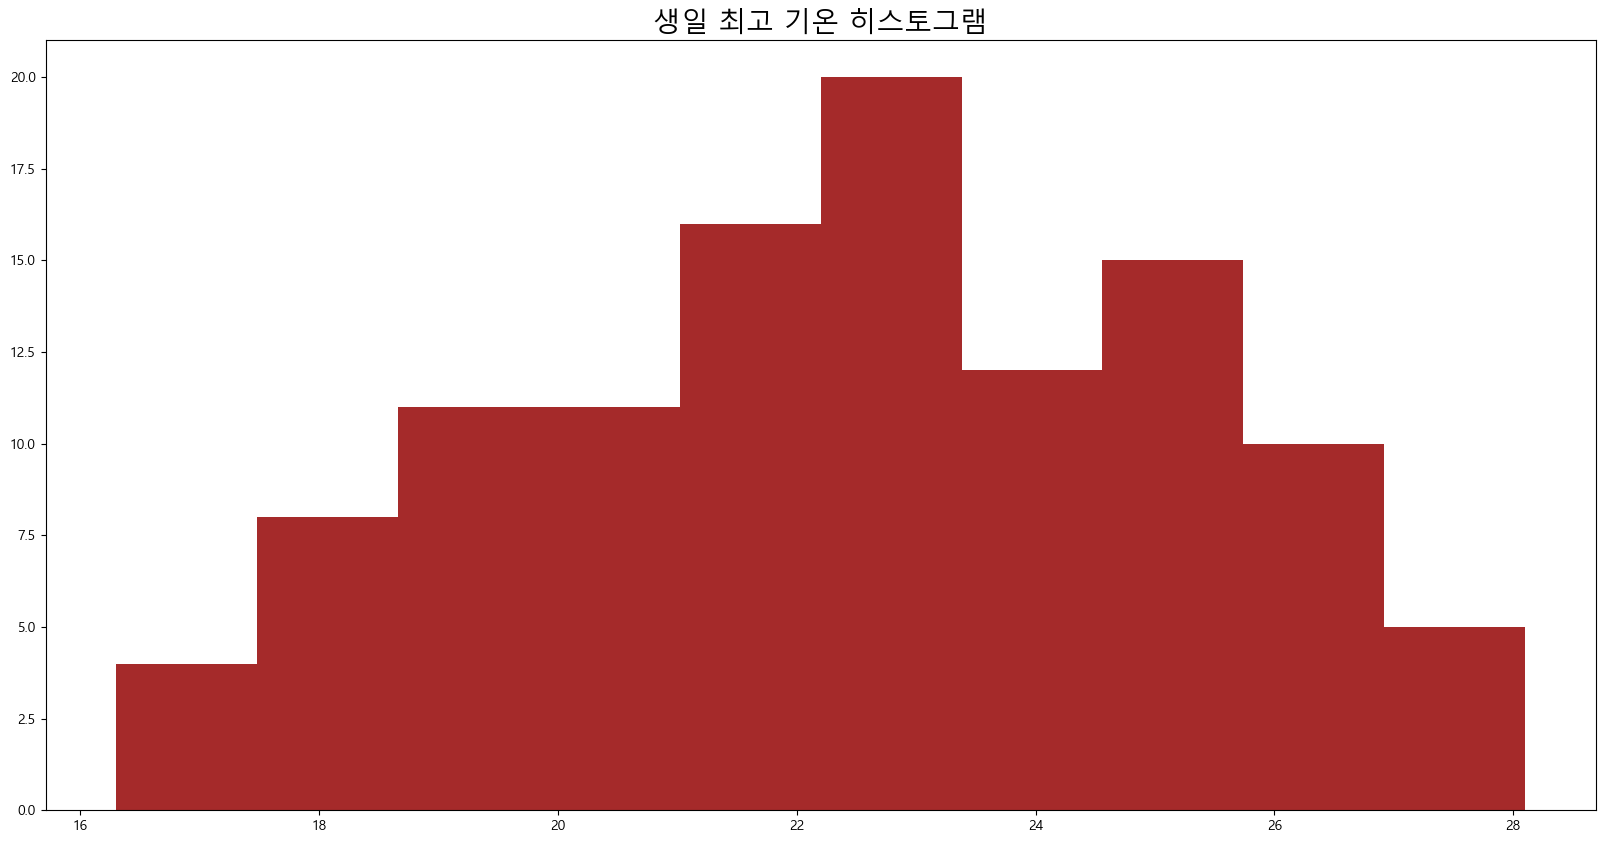

In [59]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(birthday_df["최고기온"], color = "brown")
ax.set_title("생일 최고 기온 히스토그램", size = 20)

plt.show()

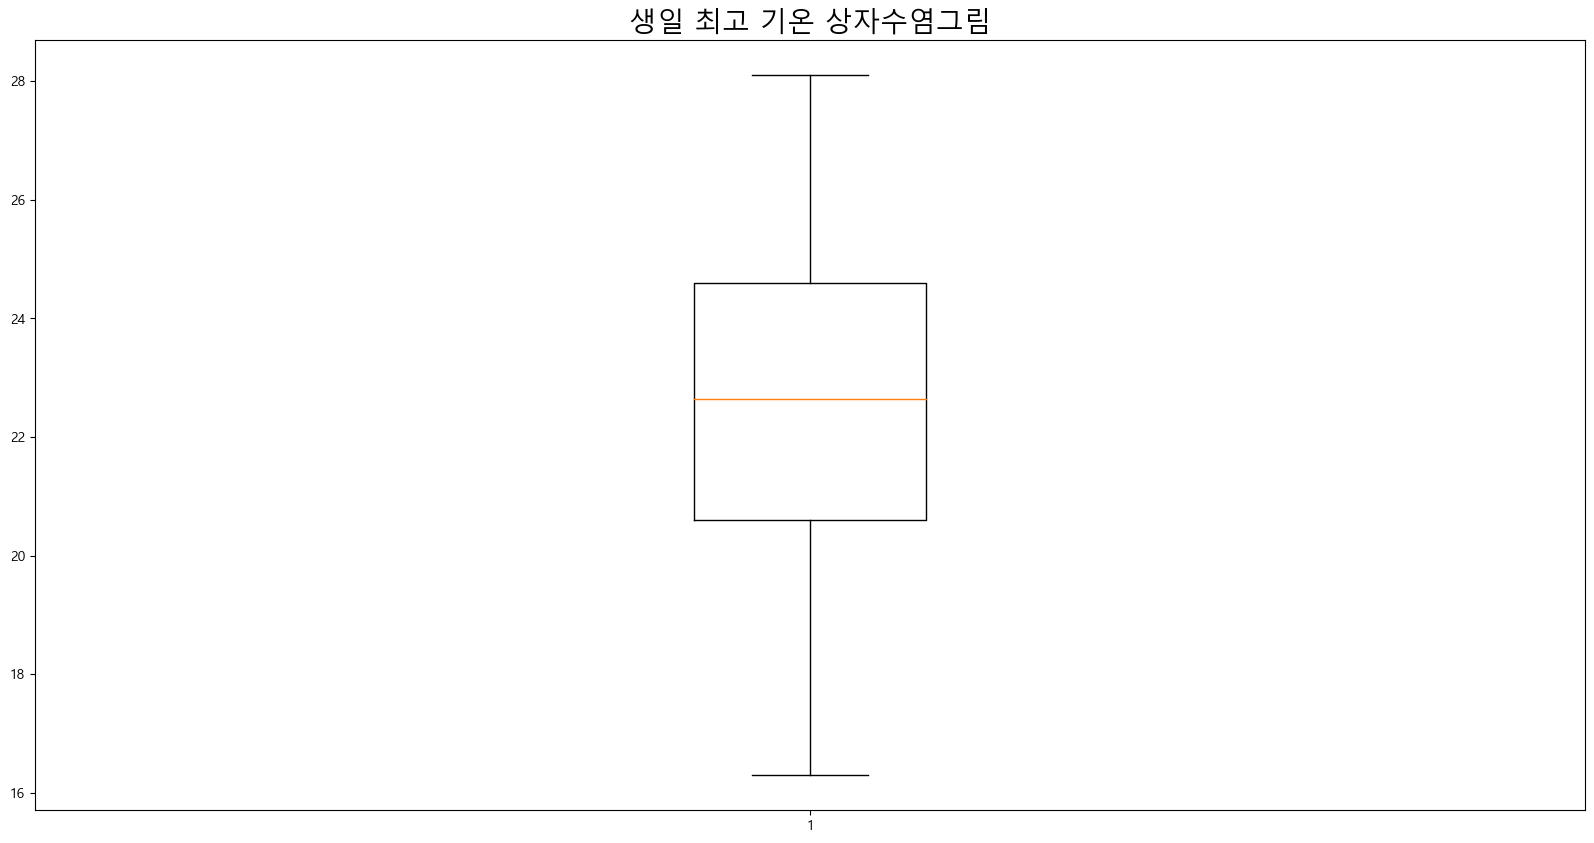

In [60]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

ax.boxplot(birthday_df["최고기온"].dropna())
ax.set_title("생일 최고 기온 상자수염그림", size = 20)
plt.show()